# EDA 2
## 해야할 것
2019.12.14 ~

1. 고객 클러스터링 돌려보기
2. 시간 범주화 시켜서 변수로 만들기 ㅇ
3. 외부데이터 찾아두기
4. 키워드 전처리 : 특수문자 딱히 없음
5. biz_unit ??????
6. aciontype 2->3 


## 알아낸 것
1. trans_id가 없으면 sech_kwd가 없다 = sech키워드만 빼와서 전처리해도 될듯
2. 연관성분석 새롭게 알만한 것 없음

### import package

In [1]:
# -*- coding: cp949 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import pandas_profiling as pp
import datetime

from datetime import time
from IPython.display import Image
%matplotlib inline

In [2]:
# matplotlib 한글 적용
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/DXMSubtitlesM-KSCpc-EUC-H.ttf").get_name()
rc('font', family=font_name)

In [3]:
# 코드 수행 시간 측정
start = timeit.default_timer()
stop = timeit.default_timer()
# print(stop - start)

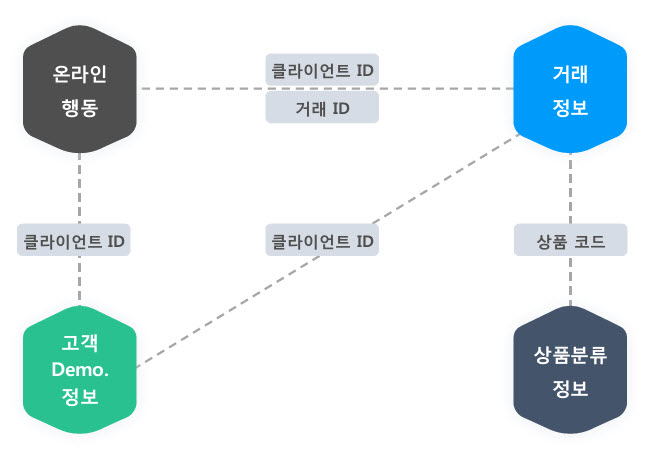

In [4]:
Image("데이터 흐름도.jpg")

In [5]:
online = pd.read_csv('제6회 L.POINT Big Data Competition-분석용데이터-01.온라인 행동 정보.csv')
transaction = pd.read_csv('제6회 L.POINT Big Data Competition-분석용데이터-02.거래 정보.csv')
client = pd.read_csv('제6회 L.POINT Big Data Competition-분석용데이터-03.고객 Demographic 정보.csv')
products = pd.read_csv('제6회 L.POINT Big Data Competition-분석용데이터-04.상품분류 정보.csv')

C:\Users\huiyeon\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 전체 merge
온라인행동정보(online) + 고객정보(client) + 거래정보(transaction) + 상품(products) 

*상품(products)넘버가 없는 unknown존재하여 products에 행 추가*

 - trans_id가 있으면, sech_kwd가 없다

In [6]:
# merge -> 전처리
online_client = pd.merge(online, client, on=['clnt_id'])
online_client_transaction = pd.merge(online_client, transaction, on=['clnt_id', 'trans_id'])  # how='left' 뺴면 구매고객만
online_client_transaction['pd_c'] = pd.to_numeric(online_client_transaction['pd_c'],
                                                  errors='coerce')
All_data = pd.merge(online_client_transaction,
                    products, on=['pd_c'], how='left')

All_data.sort_values(['clnt_id', 'sess_id', 'trans_seq'], inplace=True)
All_data.reset_index(inplace=True)
All_data.drop(['index'], axis=1, inplace=True)
All_data.drop(['biz_unit_y'], axis=1, inplace=True)
All_data.rename(columns={'biz_unit_x': 'biz_unit'}, inplace=True)

All_data.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,clnt_age,trans_seq,pd_c,de_dt,de_tm,buy_am,buy_ct,clac_nm1,clac_nm2,clac_nm3
0,2,1,37,6,A03,20190728,23:47,791905,62037.0,NaN,...,30,1,92.0,20190729,23:47,36000,20,Beverages,Coffee Drinks,Coffee Drinks
1,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,30,1,186.0,20190731,21:25,3790,1,Chilled Foods,Fish Cakes and Crab Sticks,Crab Sticks
2,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,30,2,151.0,20190731,21:25,3990,1,Canned / Jarred Foods,Canned Agricultural Foods,Canned Vegetable Foods
3,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,30,3,351.0,20190731,21:25,4690,1,Dairy Products,Processed Dairy Products,Cream and Condensed milk
4,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,30,4,189.0,20190731,21:25,4290,1,Chilled Foods,Fish Cakes and Crab Sticks,Fried Tofu


In [7]:
np.sum(pd.isnull(All_data))

clnt_id                 0
sess_id                 0
hit_seq                 0
action_type             0
biz_unit                0
sess_dt                 0
hit_tm                  0
hit_pss_tm              0
trans_id                0
sech_kwd           127358
tot_pag_view_ct         0
tot_sess_hr_v         300
trfc_src                0
dvc_ctg_nm          91475
clnt_gender             0
clnt_age                0
trans_seq               0
pd_c                 4263
de_dt                   0
de_tm                   0
buy_am                  0
buy_ct                  0
clac_nm1             4263
clac_nm2             4263
clac_nm3             4268
dtype: int64

In [8]:
# EDA 레포트 생성
pr = All_data.profile_report()  # 프로파일링 결과 리포트를 pr에 저장
# data.profile.report() # 바로 결과 보기
pr.to_file('./pr_report.html')  # pr_report.html 파일로 저장

In [9]:
TT = All_data.copy()
TT['de_tm'] = pd.to_datetime(TT['de_tm'], format='%H:%M')
TT['de_hour'] = TT['de_tm'].dt.hour
TT['de_tm'] = pd.to_datetime(TT['de_tm'], format='%H:%M').dt.time
TT[['de_tm', 'de_hour']]

,de_tm,de_hour
0,23:47:00,23
1,21:25:00,21
2,21:25:00,21
3,21:25:00,21
4,21:25:00,21
...,...,...
127353,09:46:00,9
127354,13:59:00,13
127355,11:48:00,11
127356,17:12:00,17


In [10]:
TT.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,trans_seq,pd_c,de_dt,de_tm,buy_am,buy_ct,clac_nm1,clac_nm2,clac_nm3,de_hour
0,2,1,37,6,A03,20190728,23:47,791905,62037.0,NaN,...,1,92.0,20190729,23:47:00,36000,20,Beverages,Coffee Drinks,Coffee Drinks,23
1,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,1,186.0,20190731,21:25:00,3790,1,Chilled Foods,Fish Cakes and Crab Sticks,Crab Sticks,21
2,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,2,151.0,20190731,21:25:00,3990,1,Canned / Jarred Foods,Canned Agricultural Foods,Canned Vegetable Foods,21
3,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,3,351.0,20190731,21:25:00,4690,1,Dairy Products,Processed Dairy Products,Cream and Condensed milk,21
4,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,4,189.0,20190731,21:25:00,4290,1,Chilled Foods,Fish Cakes and Crab Sticks,Fried Tofu,21


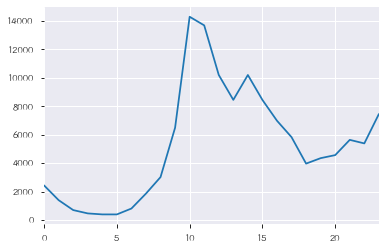

In [11]:
TT.de_hour.value_counts().sort_index().plot()

### 시간 범주화

In [13]:
# 시간 범주화
# 0-3, 3-6, 6-9, 9-12, 12-15, 15-18, 18-21, 21-0
def Time_change(time_var):
    time_dic = []
    for i in range(len(time_var)):
        hour = TT.de_tm[i].hour
        if hour >= 0 and hour < 3:
            time_dic.append('0시-3시')
        elif hour >= 3 and hour < 6:
            time_dic.append('3시-6시')
        elif hour >= 6 and hour < 9:
            time_dic.append('6시-9시')
        elif hour >= 9 and hour < 12:
            time_dic.append('9시-12시')
        elif hour >= 12 and hour < 15:
            time_dic.append('12시-15시')
        elif hour >= 15 and hour < 18:
            time_dic.append('15시-18시')
        elif hour >= 18 and hour < 21:
            time_dic.append('18시-21시')
        elif hour >=21 or hour < 0:
            time_dic.append('21시-0시')
    return time_dic  

time_var = TT.de_tm
a = Time_change(time_var)

In [14]:
TT['dt_dic'] = a
TT.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,pd_c,de_dt,de_tm,buy_am,buy_ct,clac_nm1,clac_nm2,clac_nm3,de_hour,dt_dic
0,2,1,37,6,A03,20190728,23:47,791905,62037.0,NaN,...,92.0,20190729,23:47:00,36000,20,Beverages,Coffee Drinks,Coffee Drinks,23,21시-0시
1,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,186.0,20190731,21:25:00,3790,1,Chilled Foods,Fish Cakes and Crab Sticks,Crab Sticks,21,21시-0시
2,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,151.0,20190731,21:25:00,3990,1,Canned / Jarred Foods,Canned Agricultural Foods,Canned Vegetable Foods,21,21시-0시
3,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,351.0,20190731,21:25:00,4690,1,Dairy Products,Processed Dairy Products,Cream and Condensed milk,21,21시-0시
4,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,189.0,20190731,21:25:00,4290,1,Chilled Foods,Fish Cakes and Crab Sticks,Fried Tofu,21,21시-0시


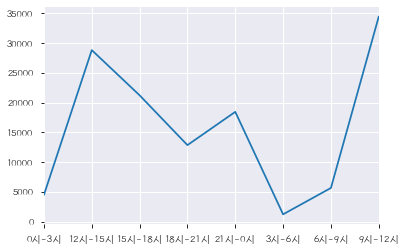

In [15]:
TT.dt_dic.value_counts().sort_index().plot()

### 키워드 전처리
- 두가지 키워드 나눠줘야할까?


In [16]:
import re

In [18]:
# online + client 데이터 사용하여 키워드 전처리
online_client[online_client['sech_kwd'].notnull()].head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,clnt_gender,clnt_age
97,30605,16,1,0,A03,20190907,22:04,14548,NaN,버터,3.0,39.0,DIRECT,NaN,unknown,unknown
98,30605,12,2,0,A03,20190821,23:36,422952,NaN,카누,5.0,467.0,DIRECT,NaN,unknown,unknown
99,30605,13,1,0,A03,20190822,14:47,0,NaN,카누,1.0,NaN,DIRECT,NaN,unknown,unknown
116,28304,1,13,0,A03,20190716,11:36,933562,NaN,비비고만두,56.0,1303.0,PUSH,mobile_web,F,50
117,28304,1,11,0,A03,20190716,11:35,820901,NaN,어묵,56.0,1303.0,PUSH,mobile_web,F,50


In [23]:
# 전처리가 아니라 두가지 키워드 나눠줘야할까?????
pd.set_option('display.max_rows', 50)  # 전체 데이터 살펴보기
online_client[online_client['sech_kwd'].notnull()].sech_kwd

97                 버터
98                 카누
99                 카누
116             비비고만두
117                어묵
              ...    
3196357          노니구미
3196358    디스커버리여성반팔티
3196359           볼링티
3196360        여성메탈시계
3196361        여성메탈시계
Name: sech_kwd, Length: 651638, dtype: object

### 연관성 분석
: 중분류 아무것도 안나옴, 대분류 지지도 0.01일 때만 나오는데 쓸모없음

In [72]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [24]:
TT.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,pd_c,de_dt,de_tm,buy_am,buy_ct,clac_nm1,clac_nm2,clac_nm3,de_hour,dt_dic
0,2,1,37,6,A03,20190728,23:47,791905,62037.0,NaN,...,92.0,20190729,23:47:00,36000,20,Beverages,Coffee Drinks,Coffee Drinks,23,21시-0시
1,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,186.0,20190731,21:25:00,3790,1,Chilled Foods,Fish Cakes and Crab Sticks,Crab Sticks,21,21시-0시
2,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,151.0,20190731,21:25:00,3990,1,Canned / Jarred Foods,Canned Agricultural Foods,Canned Vegetable Foods,21,21시-0시
3,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,351.0,20190731,21:25:00,4690,1,Dairy Products,Processed Dairy Products,Cream and Condensed milk,21,21시-0시
4,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,189.0,20190731,21:25:00,4290,1,Chilled Foods,Fish Cakes and Crab Sticks,Fried Tofu,21,21시-0시


In [146]:
ex1 = TT[['trans_id','clac_nm1','clac_nm2']]
ex1.dropna(inplace=True)

In [168]:
# NaN : Error
dataset = ex1.groupby('trans_id', sort=False).clac_nm2.apply(lambda x : ', '.join(set(x))).reset_index()
dataset1 = ex1.groupby('trans_id', sort=False).clac_nm1.apply(lambda x : ', '.join(set(x))).reset_index()

In [169]:
for i in range(len(dataset1)):
    dataset1.clac_nm1[i] = dataset1.clac_nm1[i].split(',')

dataset1.drop('trans_id', axis=1)

,clac_nm1
0,[Beverages]
1,"[Chilled Foods, Beverages, Dairy Products, ..."
2,[Beverages]
3,[Substitute Foods]
4,"[Spices / Seasonings, Frozen Foods, Snack Fo..."
...,...
21797,[Other Products]
21798,[Personal Care]
21799,[Dairy Products]
21800,[Cell Phones / Accessories]


In [171]:
Row_list =[] 
  
for rows in dataset1.itertuples(): 
    my_list = rows.clac_nm1
    Row_list.append(my_list) 


[['Beverages'], ['Chilled Foods', ' Beverages', ' Dairy Products', ' Canned / Jarred Foods'], ['Beverages'], ['Substitute Foods'], ['Spices / Seasonings', ' Frozen Foods', ' Snack Foods', ' Beverages', ' Dairy Products', ' Substitute Foods', ' Personal Care'], ['Chilled Foods', ' Frozen Foods', ' Snack Foods', ' Dairy Products', ' Substitute Foods'], ["Kids' Clothing"], ['Spices / Seasonings', ' Frozen Foods', ' Beverages', ' Dairy Products', ' Canned / Jarred Foods', ' Substitute Foods'], ['Meats', ' Frozen Foods', ' Snack Foods', ' Dairy Products', ' Grains', ' Substitute Foods'], ['Meats', ' Fruits', ' Tableware / Cooking Utensils'], ['Bedding / Handicraft'], ["Women's Clothing"], ["Women's Clothing"], ['Gardening / Pets'], ['Meats', ' Vegetables', ' Chilled Foods', ' Snack Foods'], ['Chilled Foods', ' Snack Foods', ' Dairy Products', ' Substitute Foods', ' Vegetables'], ['Meats', ' Snack Foods', ' Substitute Foods', ' Vegetables', ' Fruits'], ['Chilled Foods', ' Dairy Products', ' 

In [174]:
te = TransactionEncoder()
te_ary = te.fit(dataset1.clac_nm1).transform(dataset1.clac_nm1)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,Automotive Products,Baby Foods,Ball Game / Field Sports,Bedding / Handicraft,Beverages,Birth Supplies / Baby Products,Books / Records / Instruments,Canned / Jarred Foods,Cell Phones / Accessories,Chilled Foods,...,Stationary / Office Supplies,Substitute Foods,Tableware / Cooking Utensils,Tools / Safety Supplies,Toy,Travel / Leisure Services,Underwear / Socks and Hosiery / Homewear,Vegetables,Video / Audio System Electronics,Women's Clothing
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [182]:
frequent = apriori(df, min_support=0.1, use_colnames=True)
frequent

,support,itemsets
0,0.203835,( Beverages)
1,0.304697,( Dairy Products)
2,0.100771,( Detergents / Hygiene Goods)
3,0.185809,( Frozen Foods)
4,0.220393,( Fruits)
5,0.119530,( Meats)
6,0.203926,( Snack Foods)
7,0.104761,( Spices / Seasonings)
8,0.297312,( Substitute Foods)
9,0.291028,( Vegetables)


In [180]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent, metric='confidence', min_threshold=0.01)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


### 고객 클러스터링